<a href="https://colab.research.google.com/github/sumantn16/Exploratory_Data_Analysis/blob/master/EDA_Auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('car-mpg.csv')

In [0]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


Hence there are no missing values in our dataset. But feauture called hp is having object as datatype. Lets check the summary statistics of the dataset and analyse hp attribute

#### Things to perform in exploratory data analysis.

- Univariate and multivariate analysis of columns

-  missing values treatment or data cleaning

- find pattern in car name, if any.

- find relation between mpg (dependent) and other independent variables.


In [0]:
df['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Although at high level it seems no missing value but some special characters are present in the data. Need to treat

In [0]:
df = df.replace('?',np.nan)

In [0]:
df['hp']=df.hp.astype('float64')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


It shows that there are 6 null values present in hp column. Lets replace them with median.

In [0]:
df['hp']=df['hp'].fillna(df['hp'].median())

In [0]:
df.hp.describe() # to ensure that the missing values ae rightly replaced or not.

count    398.000000
mean     104.304020
std       38.222625
min       46.000000
25%       76.000000
50%       93.500000
75%      125.000000
max      230.000000
Name: hp, dtype: float64

In [0]:
df.car_type.unique()

array([0, 1], dtype=int64)

[]

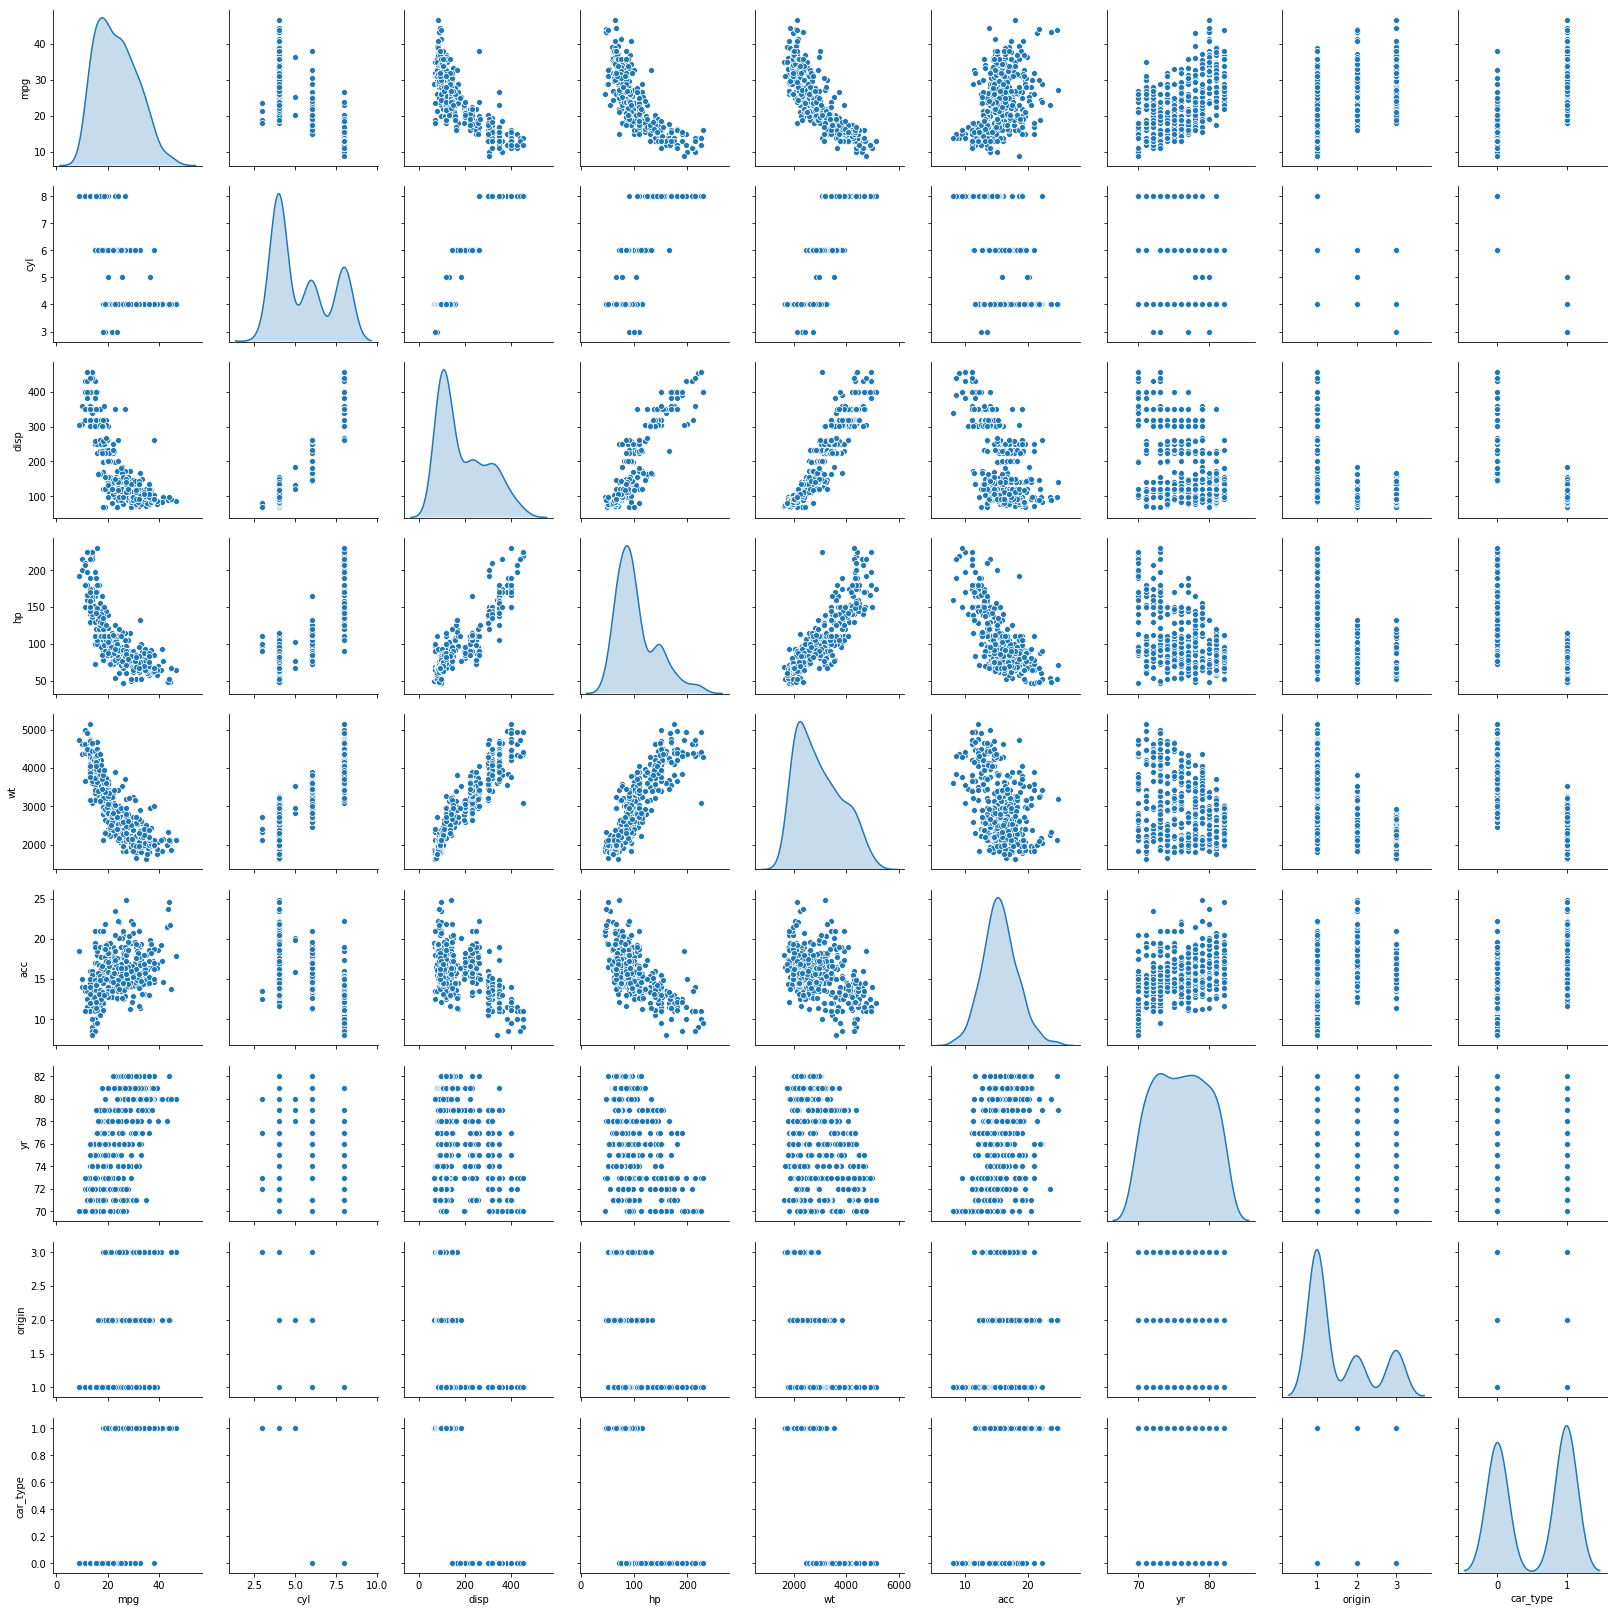

In [0]:
sns.pairplot(df,diag_kind='kde')
plt.plot()

- Above graph shows that the mpg value is having good relation with disp, hp, wt. 

- Origin, car-type, cyl are good separators of the data in different clusters.

- But at the same time there is high multicolinearity being oberved between disp and hp,wt. acc and hp 

In [0]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type',
       'car_name'],
      dtype='object')

In [0]:
for i in ['cyl','origin','car_type']:
    df[i] = df[i].astype('category')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null category
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null category
car_type    398 non-null category
car_name    398 non-null object
dtypes: category(3), float64(4), int64(2), object(1)
memory usage: 23.4+ KB


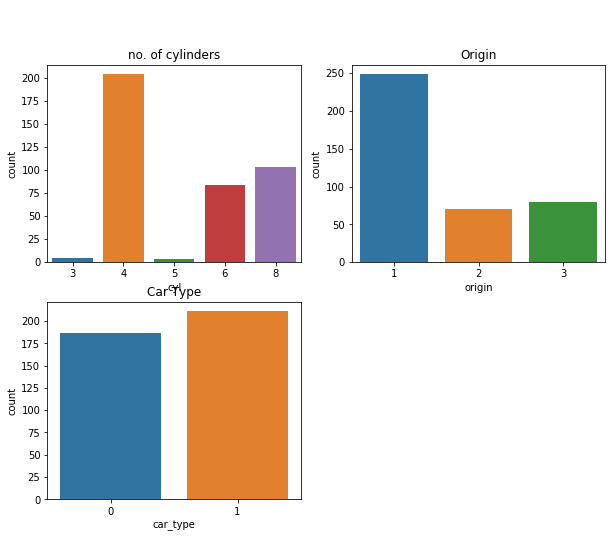

In [0]:
plt.figure(1,figsize=(10,8))
plt.suptitle(' ')

plt.subplot(221)
sns.countplot(df.cyl)
plt.title('no. of cylinders')

plt.subplot(222)
sns.countplot(df.origin)
plt.title('Origin')

plt.subplot(223)
sns.countplot(df.car_type)
plt.title('Car Type')

plt.show()

- Hence we can conclude that cars having number of cylinders 4 is mostly sold. Also 6 and 8 are having comparatively good sell.

- Also car origin of kind 1 is most preferable by customers.

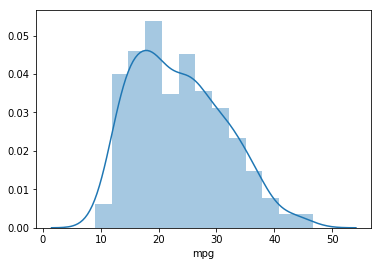

In [0]:
sns.distplot(df['mpg'])
plt.show()

From above plot we can see the distribution of car milleage which is little bit right skewed

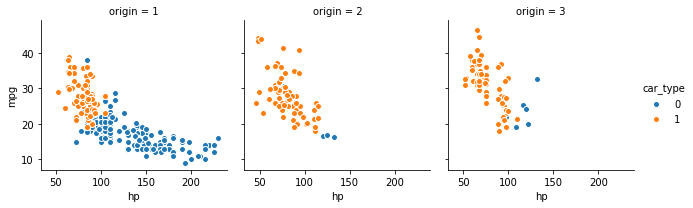

In [0]:
sns.FacetGrid(df, col="origin",  hue="car_type").map(plt.scatter, "hp", "mpg", edgecolor="w").add_legend()

- Hence from above we can conclude that car type of category 0 is present only in origin 1.

- Also hp is ranging from 50 to 250 in case of origin 1 cars. But in case of origin 2 and 3, its ranging from 50 to 120.

- Car type 1 is having high mpg than car type 0

- As we go on increasing the hp, mpg go on decreasing, but this is happening only in case of origin 1 cars.

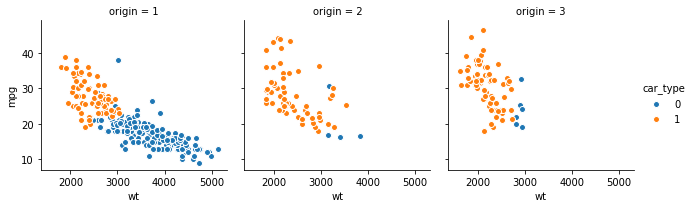

In [0]:
sns.FacetGrid(df,col='origin',hue='car_type').map(plt.scatter,'wt','mpg',edgecolor='w').add_legend()

- Again, same thing in case og weight of car, as weight goes in increasing, mpg decreases but only in case of origin 1 and 2

In [0]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,ford torino


We can calculate how old is the car. And whether car age is determining factor for mpg or not. Lets check it.

In [0]:
df['yr'] = df['yr'].astype('str')
df['yr'] = df.yr.str.pad(3,side = 'left',fillchar = '9') # as we can add only one char at a time. after this 1 will be added to makle it to 1970

In [0]:
df['yr'] = df.yr.str.pad(4,side='left',fillchar='1')

In [0]:
df.yr.unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982'], dtype=object)

In [0]:
df['yr']=df['yr'].astype('int')

In [0]:
import datetime as dt
dt.datetime.now().year

2019

In [0]:
df['Age'] = dt.datetime.now().year - df['yr']

In [0]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name,Age
0,18.0,8,307.0,130.0,3504,12.0,1970,1,0,chevrolet chevelle malibu,49
1,15.0,8,350.0,165.0,3693,11.5,1970,1,0,buick skylark 320,49
2,18.0,8,318.0,150.0,3436,11.0,1970,1,0,plymouth satellite,49
3,16.0,8,304.0,150.0,3433,12.0,1970,1,0,amc rebel sst,49
4,17.0,8,302.0,140.0,3449,10.5,1970,1,0,ford torino,49


In [0]:
df = df.drop('yr',1)

Now finding realtion between age and mpg

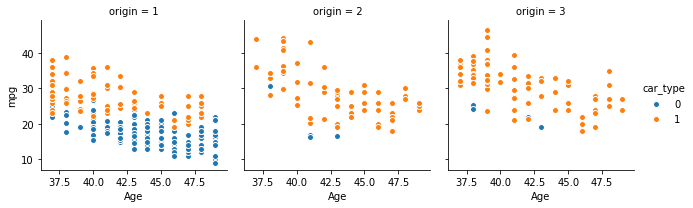

In [0]:
plt.scatter('origin','mpg',edgecolor='w'.add_legend()
plt.show()

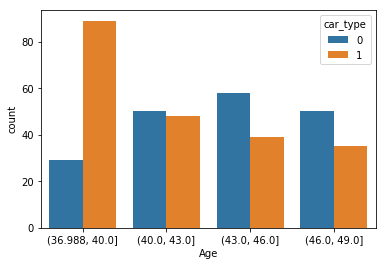

In [0]:
sns.countplot(pd.cut(df['Age'],bins=4),hue=df['car_type'])

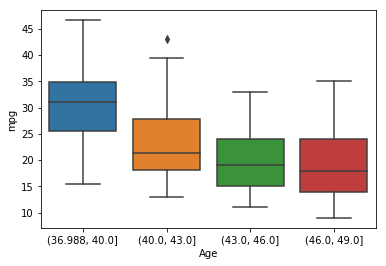

In [0]:
sns.boxplot(pd.cut(df['Age'],bins=4),df['mpg'])
plt.show()

Hence above graph is showing us that the cars age upto 40 are having good mpg. And as the age increases, mpg value is decreasing.

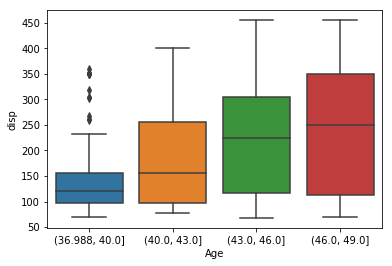

In [0]:
sns.boxplot(pd.cut(df['Age'],bins=4),df['disp'])
plt.show()

Also the aged cars are having high distribution of engine displacement as compared to the newer cars. Although high displacement, still the milleage we are getting is less, maybe because of some other problems.

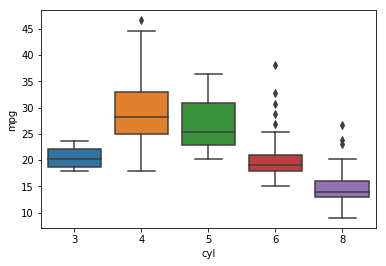

In [0]:
sns.boxplot(df.cyl,df.mpg)
plt.show()

Hence 4 cylinder cars have high value of mpg as compared to other cars. Also 8 cylinder cars have least mpg value

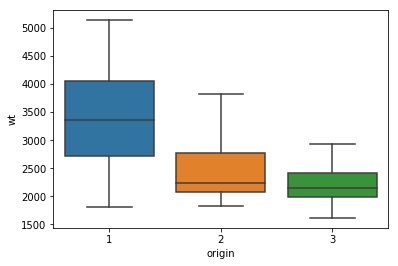

In [0]:
sns.boxplot(df['origin'],df['wt'])
plt.show()

Hence weight of origin 1 cars is higher than that of others.

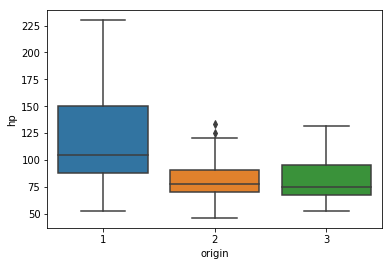

In [0]:
sns.boxplot(df['origin'],df['hp'])
plt.show()

Also origin 1 cars generate higher horsepower than others

In [0]:
m=[]
for i in df['car_name'].str.split(' '):
    m.append(i)

In [0]:
df1 = pd.DataFrame(m)

In [0]:
df1[0].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

There is some cleaning required in the car names like volkswagon. Lets fix it.

In [0]:
df1 = df[0]

In [0]:
df2 = df.join(df1)

In [0]:
df2.head()

,mpg,cyl,disp,hp,wt,acc,origin,car_type,car_name,Age,0
0,18.0,8,307.0,130.0,3504,12.0,1,0,chevrolet chevelle malibu,49,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,1,0,buick skylark 320,49,buick
2,18.0,8,318.0,150.0,3436,11.0,1,0,plymouth satellite,49,plymouth
3,16.0,8,304.0,150.0,3433,12.0,1,0,amc rebel sst,49,amc
4,17.0,8,302.0,140.0,3449,10.5,1,0,ford torino,49,ford


In [0]:
df2 = df2.rename(columns={0:'Car_Brand'})

In [0]:
df2.head()

,mpg,cyl,disp,hp,wt,acc,origin,car_type,car_name,Age,Car_Brand
0,18.0,8,307.0,130.0,3504,12.0,1,0,chevrolet chevelle malibu,49,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,1,0,buick skylark 320,49,buick
2,18.0,8,318.0,150.0,3436,11.0,1,0,plymouth satellite,49,plymouth
3,16.0,8,304.0,150.0,3433,12.0,1,0,amc rebel sst,49,amc
4,17.0,8,302.0,140.0,3449,10.5,1,0,ford torino,49,ford


In [0]:
df2 = df2.drop(['car_name'],1)

In [0]:
df2['Car_Brand']=df2['Car_Brand'].replace({'chevroelt':'chevrolet'})

In [0]:
df2['Car_Brand']=df2['Car_Brand'].replace(to_replace=['vokswagen','vw'],value='volkswagen')

In [0]:
df2['Car_Brand']=df2['Car_Brand'].replace({'chevy':'chevrolet','toyouta':'toyota','maxda':'mazda','mercedes-benz':'mercedes'})

In [0]:
df2.Car_Brand.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'capri', 'mercedes', 'cadillac', 'triumph', 'nissan'], dtype=object)

In [0]:
df2.drop(df2[df2['Car_Brand']=='hi'].index,inplace=True)

In [0]:
df2.head()

,mpg,cyl,disp,hp,wt,acc,origin,car_type,Age,Car_Brand
0,18.0,8,307.0,130.0,3504,12.0,1,0,49,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,1,0,49,buick
2,18.0,8,318.0,150.0,3436,11.0,1,0,49,plymouth
3,16.0,8,304.0,150.0,3433,12.0,1,0,49,amc
4,17.0,8,302.0,140.0,3449,10.5,1,0,49,ford


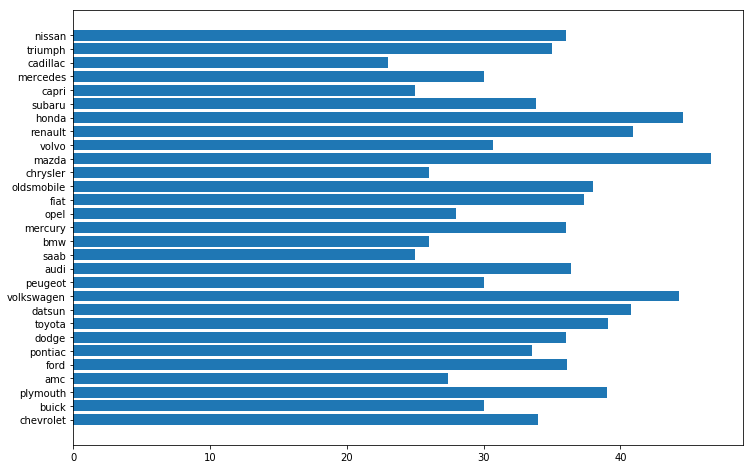

In [0]:
plt.figure(figsize=(12,8))
plt.barh(df2.Car_Brand,df2.mpg)
plt.show()

Cars like BMW, Saab, cadillac, capri, chrysler, amc have less mpg value than others.

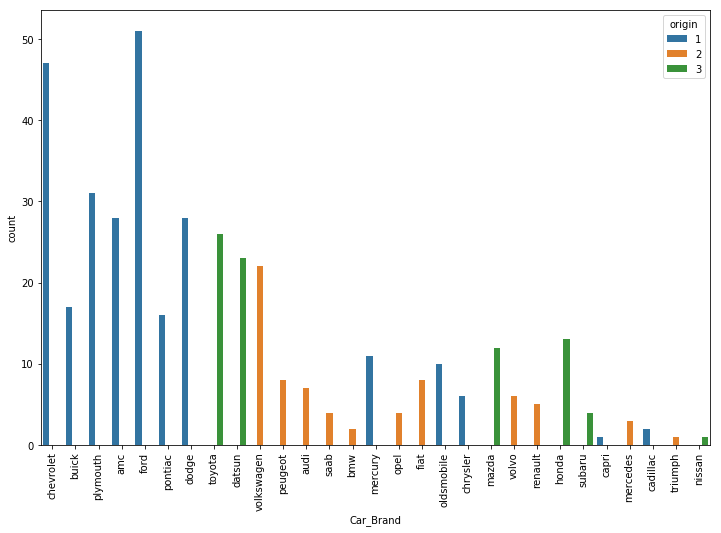

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(df2.Car_Brand,hue=df2.origin)
plt.xticks(rotation=90)
plt.show()

Now we can say that cars are having their origin as per their brand name. So, BMW,Saab,Audi,Volkwagon,etc are origin 2 cars.